In [ ]:
import numpy as np
import random
#Abrindo o arquivo txt
with open('mknapcb1.txt') as arquivo:
    conteudo = arquivo.read()
#Tirando os espaços da string
conteudo2 = conteudo.rstrip(' ')
#Retorna uma lista com todas as linhas da string
conteudo2 = conteudo2.splitlines()
#Retirando a primeira linha
conteudo2.pop(0)
#Retirando a segunda linha
conteudo2.pop(0)

#Separando o vetor benefício
benefit = []
for i in range(15):
    #print(conteudo2[i])
    conteudo3 = conteudo2[i].split(' ')
    for j in range(len(conteudo3)):
        #print(conteudo3[j])
        if conteudo3[j]!= '':
            benefit.append(int(conteudo3[j]))

#Separando os vetores custos
#Bolso 1
cost_pack1 = []
for i in range(15,30):
    #print(conteudo2[i])
    conteudo3 = conteudo2[i].split(' ')
    for j in range(len(conteudo3)):
        #print(conteudo3[j])
        if conteudo3[j]!= '':
            cost_pack1.append(int(conteudo3[j]))

#Bolso 2
cost_pack2 = []
for i in range(30,45):
    #print(conteudo2[i])
    conteudo3 = conteudo2[i].split(' ')
    for j in range(len(conteudo3)):
        #print(conteudo3[j])
        if conteudo3[j]!= '':
            cost_pack2.append(int(conteudo3[j]))

#Bolso 3
cost_pack3 = []
for i in range(45,60):
    #print(conteudo2[i])
    conteudo3 = conteudo2[i].split(' ')
    for j in range(len(conteudo3)):
        #print(conteudo3[j])
        if conteudo3[j]!= '':
            cost_pack3.append(int(conteudo3[j]))

#Bolso 4
cost_pack4 = []
for i in range(60,75):
    #print(conteudo2[i])
    conteudo3 = conteudo2[i].split(' ')
    for j in range(len(conteudo3)):
        #print(conteudo3[j])
        if conteudo3[j]!= '':
            cost_pack4.append(int(conteudo3[j]))

#Bolso 5
cost_pack5 = []
for i in range(75,90):
    #print(conteudo2[i])
    conteudo3 = conteudo2[i].split(' ')
    for j in range(len(conteudo3)):
        #print(conteudo3[j])
        if conteudo3[j]!= '':
            cost_pack5.append(int(conteudo3[j]))

#Separando o vetor limite
limite = conteudo2[90].split(' ')
#Removendo os caracteres vazios
limite.remove('')
limite.remove('')
#Transformar limite em uma lista numérica
limitnum = []
for i in range(len(limite)):
    limitnum.append(int(limite[i]))

#Juntando todos os custos em uma só lista
w = [cost_pack1,cost_pack2,cost_pack3,cost_pack4,cost_pack5]

#Função fitness
def f(X):
#Calculando os lucros para as sequências aleatórias
    for i in range(len(w)):
        if (np.dot(X,w[i])>limitnum[i]):
            total_profit = np.dot(X,benefit)
            factor = 1.5
            peso_total = np.dot(X,w[i])*factor
            penalty = total_profit*((peso_total-limitnum[i])/limitnum[i])
            return -(total_profit-penalty)
    return -np.dot(X,benefit)

#Cruzamento
def cruzamento(pai,mae,prob_cross):
    if random.random() <= prob_cross:
        corte = random.sample(range(100),1)
        filho_1 = pai[:corte[0]] + mae[corte[0]:]
        filho_2 = mae[:corte[0]] + pai[corte[0]:]
    else:
        filho_1 = pai
        filho_2 = mae
    return (filho_1, filho_2)

#Mutação
def mutacao(X,prob_muta):
    for i in range(len(X)):
        individuo = X[i]
        #random.randint(1,100)
        #if random.random() <= prob_muta:
            #cortes = random.sample(range(100),prob_muta)
            #cortes = random.sample(range(100),100-prob_muta)
        for j in range(len(individuo)):
            if random.random() <= prob_muta:
                individuo[j] = 1 - individuo[j]
                #if individuo[j] == 0:
                    #individuo[j] = 1
                #else:
                   # individuo[j] = 0
        X[i] = individuo
    return X

#Função da roleta
def roleta(X,profit):
    i=0
    soma = profit[i]/sum(profit)
    r = random.random()
    while soma < r:
        i+=1
        soma = soma + profit[i]/sum(profit)
    return (X[i],i)

'''
def roleta(X,profit):
    tamanho_pop = len(profit)
    
    #Selecionando 2 indivíduos
    ind1 = random.randint(0,tamanho_pop-1)
    ind2 = random.randint(0,tamanho_pop-1)
    
    #Vendo o lucro dos 2
    lucro_1 = profit[ind1]
    lucro_2 = profit[ind2]
    
    #Identificando o indivíduo mais poderoso
    if lucro_1 >= lucro_2:
        return (X[ind1],ind1)
    else:
        return(X[ind2],ind2)
'''
#Regeneração
def regenera(muta,pop):
    for i in range(len(muta)):
        if f(pop[i])>f(muta[i]):
                pop[i] = muta[i]
    return pop
    
#Função com as gerações
def geracoes(num_ger,prob_cross,prob_muta,n_pop):
    #Gerando a população inicial e seu lucro
    XX = []
    lucro = []
    for i in range(n_pop):
        X = []
        for j in range(100):
            new = random.randint(a=0,b=1)
            X.append(new)
        XX.append(X)
        lucro.append(f(X))
    count = 0
    pop_velha = XX
    best = [min(lucro)]
    while count < num_ger:
        nova_pop = []
        XXX = []
        lucro_muda = []
        for i in range(len(XX)):
            XXX.append(XX[i])
            lucro_muda.append(lucro[i])
        #Fazendo os cruzamentos (metade da população)
        for i in range(int(len(XX)/2)):
            #Escolhendo aleatoriamente 2 indivíduos
            X1,i1 = roleta(XXX,lucro_muda)
            #print(XXX)
            XXX.pop(i1)
            lucro_muda.pop(i1)
            #print(X1)
            X2,i2 = roleta(XXX,lucro_muda)
            XXX.pop(i2)
            lucro_muda.pop(i2)
            #Realizando o cruzamento
            filho_1, filho_2 = cruzamento(X1,X2,prob_cross)
            #Adicionando novos valores à nova população
            nova_pop.append(filho_1)
            nova_pop.append(filho_2)
        
        #Mutações nos filhos
        muta = mutacao(nova_pop,prob_muta)

        #print(len(nova_pop))
        XX = regenera(muta,pop_velha)
        pop_velha = XX
        
        #Calculando os lucros
        lucro = []
        for i in range(len(XX)):
            lucro.append(f(XX[i]))
        count = count + 1
    #print(XX,lucro_final)
        best.append(min(lucro))
    return (XX, lucro, best)
#Rodando o programa
ng = 2000
pc = 0.9
pm = 0.001
npop = 200
XX, lucro, best = geracoes(ng,pc,pm,npop)

In [ ]:
import matplotlib as plt

Text(0, 0.5, 'Função Objetivo')

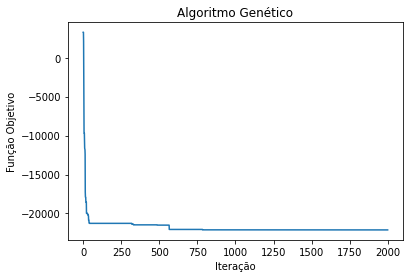

In [ ]:
plt.pyplot.plot(best)
plt.pyplot.title('Algoritmo Genético')
plt.pyplot.xlabel('Iteração')
plt.pyplot.ylabel('Função Objetivo')

In [ ]:
XX[0]

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0]

In [ ]:
!pip install geneticalgorithm

  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp37-none-any.whl size=15082 sha256=9cfc94731e76b5c36a3b751f02606e255f2277d4b8aabb4d9e897a4431669594
  Stored in directory: C:\Users\01\AppData\Local\pip\Cache\wheels\46\7c\4f\24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


Error processing line 7 of C:\Users\01\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\01\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [ ]:
import geneticalgorithm as ga

ModuleNotFoundError: ignored

In [ ]:
dir(ga)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'geneticalgorithm']

In [ ]:
model = ga.geneticalgorithm(function=f,dimension=100,variable_type='bool')

 The best solution found:                                                                           
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0.]

 Objective function:
 -22811.0


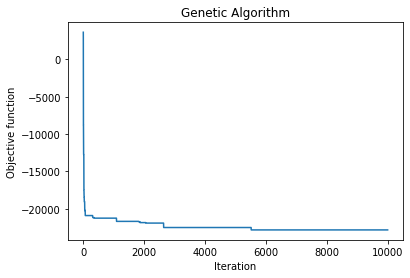

In [ ]:
model.run()

In [ ]:
cortes = random.sample(range(100),50)

In [ ]:
lista1 = [1,2,3,4]

In [ ]:
lista1.pop(2)

3

In [ ]:
lista1

[1, 2, 4]

In [ ]:
lista2 = lista1

In [ ]:
lista2.pop(1)

2

In [ ]:
lista1

[1, 4]

In [ ]:
lista2 == lista1

True

In [ ]:
lista2 = []
lista1 = [1,2,3,4]
for i,j in enumerate(lista1):
    lista2.append(j)

In [ ]:
lista2

[1, 2, 3, 4]

In [ ]:
lista2.pop(2)

3

In [ ]:
lista2

[1, 2, 4]

In [ ]:
lista1

[1, 2, 3, 4]